<h1><span style="color:red">The RED exercise</span></h1>

Simulated patterns from each of ***two classes have been drawn from an identical distribution***. I.e. there is no true difference between them. A simple classification has been run for one participant, and the ***classifier returns a suspiciously high accuracy***. 

***What is the issue?***

***Improve the analysis so that the classification score is not misleadingly high.*** There are multiple ways that this could be achieved - how many can you think of?  How many can you implement?

Extension: run your improved analysis for 35 subjects, and confirm that your classification score is not significantly higher than a chance level equivalent to 50% accuracy.

## Getting ready

Import the packages we might need:

In [1]:
import numpy as np              # Lets python process matrices, like Matlab
import matplotlib.pyplot as plt # Lets python plot graphs like Matlab

# scikit-learn is the major library for machine learning in Python:
import sklearn as skl
from sklearn import preprocessing         # includes LabelEncoder, OneHotEncoder, StandardScaler...
from sklearn import model_selection       # includes StratifiedKFold, LeaveOneGroupOut...
from sklearn import linear_model          # includes LogisticRegression, RidgeClassifier...
from sklearn import svm                   # includes SVC, NuSVC & LinearSCV...
from sklearn import discriminant_analysis # includes LinearDiscriminantAnalysis
from sklearn import metrics               # includes roc_auc_score...
from sklearn import pipeline              # includes make_pipeline


Set the random number generator:

In [2]:
np.random.seed(3)

## Simulate the data, with no true difference between conditions:

In [3]:
nvox  = 2 # number of voxels
nruns = 4 # number of runs
n_samples_per_run = 10 # number of samples/patterns per run; these will be divided into conditions/classes "0" and "1"
proportion_of_samples_from_condition_0 = 0.8

mu = np.arange(nvox)               # mean activation for both conditions (voxels all have different activation strength)
voxel_covariance = np.diag(mu) + 1 # voxel covariance for both conditions: independent noise per voxel is proportional to mean, plus some covariance

null_data_per_run = [] # list of pattern matrices (one for each run)
labels_per_run    = [] # list of label vectors    (one for each run)
for r in np.arange(nruns):
    # activations are drawn from THE SAME DISTRIBUTION FOR BOTH CONDITIONS!
    data_matrix =  np.random.multivariate_normal(mu, voxel_covariance, size=n_samples_per_run) 

    # label each sample as condition 0 or 1 (the +0 is a trick to convert the logical values to integers):
    label_vector= ((np.arange(n_samples_per_run)/n_samples_per_run) >= proportion_of_samples_from_condition_0) + 0;
    
    null_data_per_run.append( data_matrix ) 
    labels_per_run.append  ( label_vector ) 

# concatenate runs
null_data   = np.concatenate(null_data_per_run, axis = 0)             
labels      = np.concatenate(labels_per_run, axis = 0)
run_indices = np.concatenate([[i] * n_samples_per_run for i in range(nruns)]) # make vector of run indices

\
Plot the data for the first two voxels:

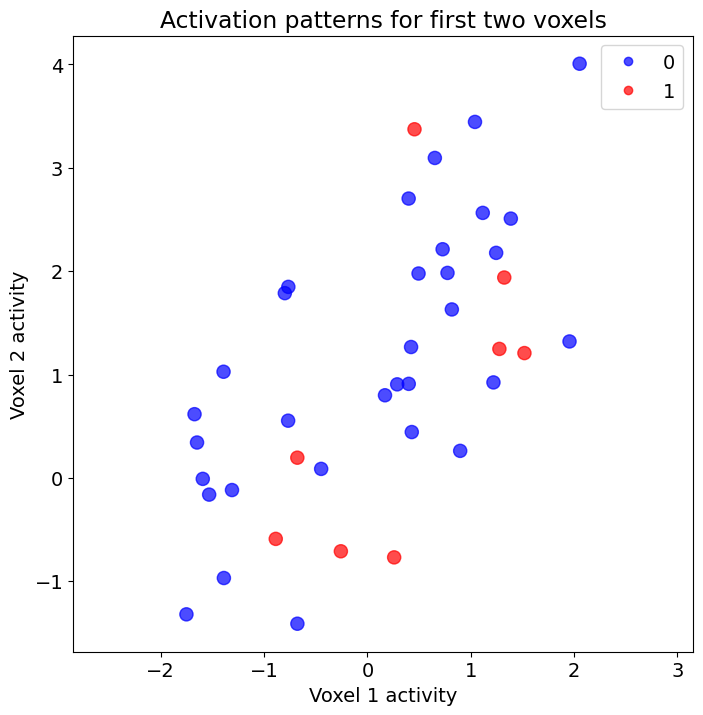

In [4]:
plt.figure(figsize = (8,8))  # create a matplotlib figure
plt.rcParams.update({'font.size': 14})
plt.title('Activation patterns for first two voxels')
scatter = plt.scatter(null_data[:,[0]], null_data[:,[1]], 
                      s = 90, alpha = 0.7, c = labels, cmap = 'bwr')
plt.legend(handles = scatter.legend_elements()[0], labels = set(np.unique(labels))) # "set" returns unique values
plt.xlabel('Voxel 1 activity')
plt.ylabel('Voxel 2 activity')
plt.axis('equal')
plt.show()

\
Specify the pre-processing, classification pipeline, and a leave-one-run-out cross-validation scheme:

In [5]:
scaler = skl.preprocessing.MinMaxScaler()
SVM    = skl.svm.LinearSVC(dual = True)
pipe   = skl.pipeline.make_pipeline(scaler, SVM)
logo   = skl.model_selection.LeaveOneGroupOut()

\
Run the classification analysis, with a fair bit of code:

In [6]:
folds = tuple(logo.split(null_data, labels, run_indices))
accuracy = np.full(nruns, np.nan) # initialise vector to store accuracies
for i, fold in enumerate(folds):
    train_idx, test_idx = fold # get the train and test indices
    pipe.fit(null_data[train_idx,:], labels[train_idx])    # do all preprocessing and model fitting on training data
    predicted_labels = pipe.predict(null_data[test_idx,:]) # do prediction on test data
    accuracy[i] = skl.metrics.accuracy_score(labels[test_idx], predicted_labels) # score the predictions
print("Accuracy per fold:", accuracy)
print("Mean accuracy for random data:", np.mean(accuracy))

Accuracy per fold: [0.8 0.8 0.8 0.8]
Mean accuracy for random data: 0.8


\
...or run it the quick way:

In [7]:
accuracy = skl.model_selection.cross_val_score(pipe, null_data, labels, groups = run_indices, cv = logo, scoring = 'accuracy')

print("Accuracy per fold:", accuracy)
print("Mean accuracy for random data:", np.mean(accuracy))

Accuracy per fold: [0.8 0.8 0.8 0.8]
Mean accuracy for random data: 0.8


## Questions:
 - We have two classes, drawn from the same distribution, so why is accuracy not close to 0.5?
 - Is the classifier performing as it should?
 - Can you change the analysis to get a classification score closer to a level equivalent to 50% accuracy? There are multiple ways that this could be achieved - how many can you think of? How many can you implement?

## Hints:
- Consider the data that are being provided to the classifier per class.
- Think about the choice of performance metric.
- Consider other options when specifying the classifier.

## Extension:
- Run your improved analysis for 35 subjects and confirm that your classification score is not significantly higher than a chance level equivalent to 50% accuracy.